In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('applicant_task.csv',
                 parse_dates=['application_datetime',
                              'first_call',
                              'first_reach',
                              'trial_appointment_datetime'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  int64         
 1   source                      10000 non-null  object        
 2   application_datetime        10000 non-null  datetime64[ns]
 3   gender                      5084 non-null   float64       
 4   first_call                  10000 non-null  datetime64[ns]
 5   first_reach                 9418 non-null   datetime64[ns]
 6   operator_group_type         10000 non-null  object        
 7   operator_group_name         10000 non-null  object        
 8   trial_appointment_datetime  10000 non-null  datetime64[ns]
 9   appointment_added_by_id     10000 non-null  int64         
 10  is_paid                     10000 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(3), object(3)
m

In [4]:
df.head()

,order_id,source,application_datetime,gender,first_call,first_reach,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid
0,10457322,a636bcf354a837fb5c25c3d5b940170b,2020-04-03 04:10:45,1.0,2020-04-03 16:43:59.508792,2020-04-03 22:11:27.455366,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-04-04 15:28:14.798018,6620229,0
1,11236929,91ce888e6774bd668a675b5640499103,2020-07-12 03:31:39,NaN,2020-07-12 04:47:12.312267,2020-07-12 07:05:38.094529,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-07-12 15:02:07.545403,4578767,0
2,10246280,91ce888e6774bd668a675b5640499103,2020-02-01 03:19:28,NaN,2020-02-04 04:45:20.910754,2020-02-04 10:42:35.204203,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-02-02 07:07:41.388133,6290758,0
3,11058994,a636bcf354a837fb5c25c3d5b940170b,2020-05-19 06:18:16,0.0,2020-05-19 07:18:45.609637,2020-05-19 08:39:54.048419,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-05-19 13:01:02.901309,4700850,0
4,10265283,91ce888e6774bd668a675b5640499103,2020-02-09 21:59:18,NaN,2020-02-10 09:14:45.941424,2020-02-10 20:01:01.297674,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-02-11 05:33:59.680231,4500083,0


<br>
Сделаем проверку на консистентность данных:<br>
<br>
1) Посмотрим на данные, где отсутствует first_reach

In [5]:
df.loc[df.first_reach.isnull()].head()

,order_id,source,application_datetime,gender,first_call,first_reach,operator_group_type,operator_group_name,trial_appointment_datetime,appointment_added_by_id,is_paid
5,11391888,4502821cb71c7f2195cd4e542273fe38,2020-09-03 22:46:59,0.0,2020-09-03 23:00:16.098750,NaT,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-09-21 01:14:13.178574,3968432,1
39,11401872,91ce888e6774bd668a675b5640499103,2020-08-28 19:00:12,1.0,2020-08-28 22:15:18.181201,NaT,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-08-30 18:45:40.678105,1450544,0
59,10418169,91ce888e6774bd668a675b5640499103,2020-04-01 09:45:04,NaN,2020-04-04 19:19:02.523160,NaT,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-04-02 07:28:07.315812,5776319,1
61,10170277,91ce888e6774bd668a675b5640499103,2020-01-10 04:47:55,NaN,2020-01-11 01:11:16.080670,NaT,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-01-10 14:39:14.958765,6343139,1
79,11448411,91ce888e6774bd668a675b5640499103,2020-09-12 14:44:11,NaN,2020-09-16 20:11:23.983257,NaT,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-09-12 17:39:20.745307,-2,1


In [6]:
df.loc[df.first_reach.isnull(), ['order_id']].count()

order_id    582
dtype: int64

Для 582 заявок был проведен вводный урок без разговора с оператором. Исходя из флоу, такого быть не должно

<br>
2) Убедимся, что время заявки application_datetime везде меньше времени первого звонка first_call

In [7]:
df.loc[df.application_datetime > df.first_call, ['order_id']].count()

order_id    13
dtype: int64

Для 13 строк это почему-то не соблюдается

<br>
3) Убедимся, что время первого звонка first_call везде меньше времени первого дозвона first_reach (там, где first_reach вообще есть)

In [8]:
df.loc[df.first_reach.notnull()] \
  .loc[df.first_call > df.first_reach, ['order_id']].count()

order_id    0
dtype: int64

<br>
4) Убедимся, что время первого дозвона first_reach везде меньше времени вводного урока trial_appointment_datetime (там, где first_reach вообще есть)

In [9]:
df.loc[df.first_reach.notnull()] \
  .loc[df.first_reach > df.trial_appointment_datetime, ['order_id']].count()

order_id    2987
dtype: int64

Это странно, для 2987 заявок почему-то сперва был вводный урок и только потом дозвон. Исходя из флоу, такого быть не должно

<br>
Посмотрим на разницу между датой заявки и датой первого звонка

In [10]:
df['time_to_call'] = df.first_reach - df.application_datetime
df['time_to_call_days'] = df['time_to_call'].dt.days

(array([8.937e+03, 1.510e+02, 1.200e+02, 7.200e+01, 3.800e+01, 3.500e+01,
        2.800e+01, 1.900e+01, 8.000e+00, 1.000e+01]),
 array([ -1. ,  41.7,  84.4, 127.1, 169.8, 212.5, 255.2, 297.9, 340.6,
        383.3, 426. ]),
 <BarContainer object of 10 artists>)

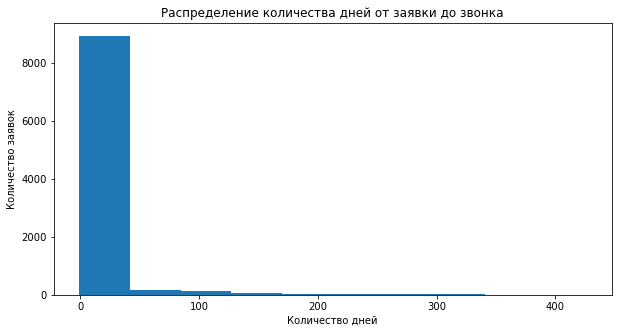

In [11]:
plt.figure(figsize=(10, 5))
plt.title('Распределение количества дней от заявки до звонка') 
plt.xlabel('Количество дней') 
plt.ylabel('Количество заявок')

plt.hist(df['time_to_call_days'])

In [12]:
more_7_days = df.loc[df['time_to_call_days'] > 7, ['time_to_call_days']].count()
all_orders = df.order_id.count()

(more_7_days / all_orders)*100

time_to_call_days    9.16
dtype: float64

Больше 9% всех заявок имееют разницу более 7 дней между датой заявки и первым звонком оператора 

<br>
Посмотрим на разницу между датой заявки и датой вводного урока

In [13]:
df['time_to_trial'] = df.trial_appointment_datetime - df.application_datetime
df['time_to_trial_days'] = df['time_to_trial'].dt.days

(array([9.75e+03, 5.60e+01, 8.90e+01, 6.00e+01, 2.20e+01, 9.00e+00,
        2.00e+00, 5.00e+00, 4.00e+00, 3.00e+00]),
 array([  0. ,  39.7,  79.4, 119.1, 158.8, 198.5, 238.2, 277.9, 317.6,
        357.3, 397. ]),
 <BarContainer object of 10 artists>)

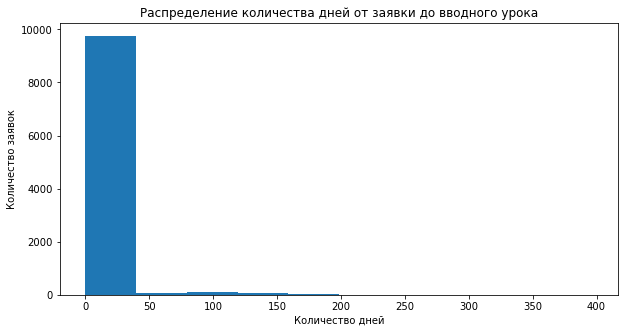

In [14]:
plt.figure(figsize=(10, 5))
plt.title('Распределение количества дней от заявки до вводного урока') 
plt.xlabel('Количество дней') 
plt.ylabel('Количество заявок')

plt.hist(df['time_to_trial_days'])

In [15]:
more_7_days = df.loc[df['time_to_trial_days'] > 7, ['time_to_trial_days']].count()

(more_7_days / all_orders)*100

time_to_trial_days    3.85
dtype: float64

Больше 3.85% всех заявок имееют разницу более 7 дней между датой заявки и датой вводного урока

<br>
Теперь перейдем к изучению данных, посмотрим общую конверсию из заявки в оплату

In [16]:
total_convers = df.is_paid.loc[df.is_paid == 1].count() / df.is_paid.count()
total_convers

0.5018

<br>
Посмотрим количество уникальных источников, типов групп операторов и названий этих групп

In [17]:
df.source.nunique()

29

In [18]:
df.operator_group_type.nunique()

3

In [19]:
df.operator_group_name.nunique()

24

<br>
Посмотрим конверсию в разбивке по источникам

In [20]:
convers_by_source_all = df.groupby(['source'], as_index=False)['is_paid'].count()
convers_by_source_is_paid = df.loc[df.is_paid == 1].groupby(['source'], as_index=False)['is_paid'].count()

convers_by_source = pd.merge(convers_by_source_all, convers_by_source_is_paid, 
                             on='source')

convers_by_source['convers'] = (convers_by_source.is_paid_y / convers_by_source.is_paid_x).round(4)

convers_by_source = convers_by_source.loc[:, ['source', 'is_paid_x', 'convers']]
convers_by_source['is_paid_x'] = (convers_by_source['is_paid_x'] / convers_by_source['is_paid_x'].sum()).round(4)*100

convers_by_source = convers_by_source.rename(columns={'is_paid_x':'perc_of_orders'}) \
                                     .sort_values(by=['perc_of_orders','convers'], ascending=False)
convers_by_source

,source,perc_of_orders,convers
16,91ce888e6774bd668a675b5640499103,79.19,0.5010
8,4502821cb71c7f2195cd4e542273fe38,8.02,0.4950
17,a636bcf354a837fb5c25c3d5b940170b,4.36,0.5229
9,4cedf3fbf9f7dc88b37bc42c66908c06,1.31,0.4885
2,2916b0834eaf3921234cdd5f2a3d0a3a,1.26,0.4762
25,f12c0522bfa2143e29832a5f3bf7c0b5,0.99,0.5152
27,f5bffc1a757263e7b8b397484d2737d7,0.58,0.5000
24,e7d707a26e7f7b6ff52c489c60e429b1,0.53,0.5660
3,2c3991193c1da7c9e7ea14adbaf4ea50,0.53,0.5283
23,cd48e195ee1a590504a0515b4f9b41e8,0.50,0.5600


<br>
Посмотрим конверсию в разбивке по типам групп операторов

In [21]:
convers_by_type_all = df.groupby(['operator_group_type'], as_index=False)['is_paid'].count()
convers_by_type_is_paid = df.loc[df.is_paid == 1].groupby(['operator_group_type'], as_index=False)['is_paid'].count()

convers_by_type = pd.merge(convers_by_type_all, convers_by_type_is_paid,
                           on='operator_group_type')

convers_by_type['convers'] = (convers_by_type.is_paid_y / convers_by_type.is_paid_x).round(4)

convers_by_type = convers_by_type.loc[:, ['operator_group_type', 'is_paid_x', 'convers']]
convers_by_type['is_paid_x'] = (convers_by_type['is_paid_x'] / convers_by_type['is_paid_x'].sum()).round(4)*100

convers_by_type = convers_by_type.rename(columns={'is_paid_x':'perc_of_orders'}) \
                                     .sort_values(by=['perc_of_orders','convers'], ascending=False)
convers_by_type

,operator_group_type,perc_of_orders,convers
1,a170e8b5b0085420fa52f9f9e1d546f9,65.57,0.5063
2,e908f62885515872936a2bf07e5960a0,33.30,0.4919
0,21790c97eeb6336e5f0fdb9ef4de636f,1.13,0.5310


<br>
Посмотрим конверсию в разбивке по типам групп операторов и названий этих групп

In [22]:
convers_by_type_name_all = df.groupby(['operator_group_type', 'operator_group_name'], as_index=False)['is_paid'].count()
convers_by_type_name_is_paid = df.loc[df.is_paid == 1] \
                                 .groupby(['operator_group_type', 'operator_group_name'], as_index=False)['is_paid'].count()
convers_by_type_name = pd.merge(convers_by_type_name_all, convers_by_type_name_is_paid,
                                on=['operator_group_type', 'operator_group_name'])

convers_by_type_name['convers'] = (convers_by_type_name.is_paid_y / convers_by_type_name.is_paid_x).round(4)

convers_by_type_name = convers_by_type_name.loc[:, ['operator_group_type', 'operator_group_name', 'is_paid_x', 'convers']]
convers_by_type_name['is_paid_x'] = (convers_by_type_name['is_paid_x'] / convers_by_type_name['is_paid_x'].sum()).round(4)*100

convers_by_type_name = convers_by_type_name.rename(columns={'is_paid_x':'perc_of_orders'}) \
                                     .sort_values(by=['operator_group_type','perc_of_orders','convers'], ascending=False)
convers_by_type_name

,operator_group_type,operator_group_name,perc_of_orders,convers
17,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,33.33,0.4919
15,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,65.02,0.5059
14,a170e8b5b0085420fa52f9f9e1d546f9,3b574fbbeb9251641816c6c5e8140e62,0.31,0.6129
16,a170e8b5b0085420fa52f9f9e1d546f9,d6a7e0ab0512ccc44e702ea978ebc5df,0.30,0.5000
1,21790c97eeb6336e5f0fdb9ef4de636f,41fcb0f55a2687355fff238d3bdf319e,0.39,0.5641
11,21790c97eeb6336e5f0fdb9ef4de636f,c2e1985524a741220fbf9448ecc94d0e,0.20,0.5000
4,21790c97eeb6336e5f0fdb9ef4de636f,63af698d7d79dadbc44ac71a068acea0,0.14,0.5000
0,21790c97eeb6336e5f0fdb9ef4de636f,4066be2336930bd56d04cb32065ba808,0.08,0.7500
5,21790c97eeb6336e5f0fdb9ef4de636f,6d208704ad0de706bd2da353ba4e4cb8,0.05,0.8000
8,21790c97eeb6336e5f0fdb9ef4de636f,73231aa8aa7a12c078c764b0fd686b34,0.05,0.2000


<br>
Взглянем на конверсию в разбивке всех трех категорий

In [23]:
convers_all = df.groupby(['source', 'operator_group_type', 'operator_group_name'], as_index=False)['is_paid'].count()
convers_is_paid = df.loc[df.is_paid == 1] \
                    .groupby(['source', 'operator_group_type', 'operator_group_name'], as_index=False)['is_paid'].count()

convers = pd.merge(convers_all, convers_is_paid,
                   on=['source', 'operator_group_type', 'operator_group_name'])

convers['convers'] = (convers.is_paid_y / convers.is_paid_x).round(4)

convers = convers.loc[:, ['source', 'operator_group_type', 'operator_group_name', 'is_paid_x', 'convers']]
convers['is_paid_x'] = (convers['is_paid_x'] / convers['is_paid_x'].sum()).round(4)*100

convers = convers.rename(columns={'is_paid_x':'perc_of_orders'}) \
                 .sort_values(by=['perc_of_orders','convers'], ascending=False)

convers.head(10)

,source,operator_group_type,operator_group_name,perc_of_orders,convers
42,91ce888e6774bd668a675b5640499103,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,50.79,0.5057
44,91ce888e6774bd668a675b5640499103,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,28.00,0.4910
19,4502821cb71c7f2195cd4e542273fe38,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,5.73,0.4956
45,a636bcf354a837fb5c25c3d5b940170b,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,3.14,0.5527
21,4502821cb71c7f2195cd4e542273fe38,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2.21,0.4818
47,a636bcf354a837fb5c25c3d5b940170b,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,1.18,0.4576
23,4cedf3fbf9f7dc88b37bc42c66908c06,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,1.08,0.4907
7,2916b0834eaf3921234cdd5f2a3d0a3a,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,0.87,0.4483
66,f12c0522bfa2143e29832a5f3bf7c0b5,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,0.85,0.5412
72,f5bffc1a757263e7b8b397484d2737d7,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,0.43,0.4884


Как мы видим, основную часть заявок составляет один и тот же источник, где, в свою очередь, основую часть обрабатывают всего две группы операторов

<br>
Посмотрим на конверсию в зависимости от времени между поступлением заявки и первым разговором с оператором в днях:

In [24]:
df_time_to_call_convers_days_all = df.groupby(['time_to_call_days'], as_index=False)['is_paid'].count()
df_time_to_call_convers_days_is_paid = df.loc[df.is_paid == 1].groupby(['time_to_call_days'], as_index=False)['is_paid'].count()

df_time_to_call_convers_days = pd.merge(df_time_to_call_convers_days_all, df_time_to_call_convers_days_is_paid,
                                  on='time_to_call_days')

df_time_to_call_convers_days['convers'] = (df_time_to_call_convers_days.is_paid_y 
                                           / df_time_to_call_convers_days.is_paid_x).round(4)

df_time_to_call_convers_days['perc_of_orders'] = (df_time_to_call_convers_days.is_paid_x
                                                  / df_time_to_call_convers_days.is_paid_x.sum()).round(4)*100

df_time_to_call_convers_days = df_time_to_call_convers_days.loc[:, ['time_to_call_days', 'perc_of_orders', 'convers']]

df_time_to_call_convers_days.head(10)

,time_to_call_days,perc_of_orders,convers
0,-1.0,0.10,0.5556
1,0.0,64.24,0.5094
2,1.0,12.57,0.4897
3,2.0,5.21,0.5072
4,3.0,3.32,0.5113
5,4.0,2.52,0.4809
6,5.0,1.49,0.5252
7,6.0,1.07,0.5700
8,7.0,0.82,0.4737
9,8.0,0.50,0.3191


<br>
В первые 24 часа:

In [25]:
df['time_to_call_hours'] = (df['time_to_call'] / dt.timedelta(hours=1)).round(0)

df_time_to_call_convers_hours_all = df.groupby(['time_to_call_hours'], as_index=False)['is_paid'].count()
df_time_to_call_convers_hours_is_paid = df.loc[df.is_paid == 1] \
                                          .groupby(['time_to_call_hours'], as_index=False)['is_paid'].count()

df_time_to_call_convers_hours = pd.merge(df_time_to_call_convers_hours_all, df_time_to_call_convers_hours_is_paid,
                                  on='time_to_call_hours')

df_time_to_call_convers_hours['convers'] = (df_time_to_call_convers_hours.is_paid_y 
                                            / df_time_to_call_convers_hours.is_paid_x).round(4)

df_time_to_call_convers_hours['perc_of_orders'] = (df_time_to_call_convers_hours.is_paid_x
                                                  / df_time_to_call_convers_hours.is_paid_x.sum()).round(4)*100

df_time_to_call_convers_hours = df_time_to_call_convers_hours.loc[:, ['time_to_call_hours', 'perc_of_orders', 'convers']]

df_time_to_call_convers_hours.head(24)

,time_to_call_hours,perc_of_orders,convers
0,0.0,1.15,0.4951
1,1.0,3.32,0.5251
2,2.0,3.22,0.4724
3,3.0,3.72,0.4776
4,4.0,3.76,0.5118
5,5.0,4.19,0.5040
6,6.0,4.06,0.5096
7,7.0,4.49,0.5223
8,8.0,4.41,0.5088
9,9.0,4.26,0.5614


<br>
Посмотрим на конверсию в зависимости от времени между поступлением заявки и проведением вводного урока в днях:

In [26]:
df_time_to_trial_convers_days_all = df.groupby(['time_to_trial_days'], as_index=False)['is_paid'].count()
df_time_to_trial_convers_days_is_paid = df.loc[df.is_paid == 1] \
                                          .groupby(['time_to_trial_days'], as_index=False)['is_paid'].count()

df_time_to_trial_convers_days = pd.merge(df_time_to_trial_convers_days_all, df_time_to_trial_convers_days_is_paid,
                                  on='time_to_trial_days')

df_time_to_trial_convers_days['convers'] = (df_time_to_trial_convers_days.is_paid_y 
                                           / df_time_to_trial_convers_days.is_paid_x).round(4)

df_time_to_trial_convers_days['perc_of_orders'] = (df_time_to_trial_convers_days.is_paid_x
                                                  / df_time_to_trial_convers_days.is_paid_x.sum()).round(4)*100

df_time_to_trial_convers_days = df_time_to_trial_convers_days.loc[:, ['time_to_trial_days', 'perc_of_orders', 'convers']]

df_time_to_trial_convers_days.head(10)

,time_to_trial_days,perc_of_orders,convers
0,0,49.30,0.4970
1,1,39.97,0.5079
2,2,4.19,0.5000
3,3,1.53,0.5592
4,4,0.80,0.5696
5,5,0.50,0.3000
6,6,0.31,0.3226
7,7,0.27,0.6667
8,8,0.19,0.5263
9,9,0.08,0.5000


<br>
Посмотрим на конверсию в зависимости от дня недели, в который поступила заявка

In [27]:
df['order_day_of_week'] = df.application_datetime.dt.dayofweek
df['order_day_name'] = df.application_datetime.dt.day_name()

df_order_day_of_week_all = df.groupby(['order_day_of_week', 'order_day_name'], as_index=False)['is_paid'].count()
df_order_day_of_week_is_paid = df.loc[df.is_paid == 1] \
                                          .groupby(['order_day_of_week', 'order_day_name'], as_index=False)['is_paid'].count()

df_order_day_of_week = pd.merge(df_order_day_of_week_all, df_order_day_of_week_is_paid,
                                  on=['order_day_of_week','order_day_name'])

df_order_day_of_week['convers'] = (df_order_day_of_week.is_paid_y / df_order_day_of_week.is_paid_x).round(4)

df_order_day_of_week['perc_of_orders'] = (df_order_day_of_week.is_paid_x
                                          / df_order_day_of_week.is_paid_x.sum()).round(4)*100

df_order_day_of_week = df_order_day_of_week.loc[:, ['order_day_name', 'perc_of_orders', 'convers']]

df_order_day_of_week

,order_day_name,perc_of_orders,convers
0,Monday,13.89,0.5068
1,Tuesday,14.55,0.5079
2,Wednesday,14.15,0.4996
3,Thursday,14.48,0.4890
4,Friday,14.25,0.5074
5,Saturday,14.38,0.4986
6,Sunday,14.30,0.5035


<br>
Посмотрим на конверсию в зависимости от дня недели, в который был проведен вводный урок

In [28]:
df['trial_day_of_week'] = df.trial_appointment_datetime.dt.dayofweek
df['trial_day_name'] = df.trial_appointment_datetime.dt.day_name()

df_trial_day_of_week_all = df.groupby(['trial_day_of_week', 'trial_day_name'], as_index=False)['is_paid'].count()
df_trial_day_of_week_is_paid = df.loc[df.is_paid == 1] \
                                          .groupby(['trial_day_of_week', 'trial_day_name'], as_index=False)['is_paid'].count()

df_trial_day_of_week = pd.merge(df_trial_day_of_week_all, df_trial_day_of_week_is_paid,
                                  on=['trial_day_of_week','trial_day_name'])

df_trial_day_of_week['convers'] = (df_trial_day_of_week.is_paid_y / df_trial_day_of_week.is_paid_x).round(4)

df_trial_day_of_week['perc_of_orders'] = (df_trial_day_of_week.is_paid_x
                                          / df_trial_day_of_week.is_paid_x.sum()).round(4)*100

df_trial_day_of_week = df_trial_day_of_week.loc[:, ['trial_day_name', 'perc_of_orders', 'convers']]

df_trial_day_of_week

,trial_day_name,perc_of_orders,convers
0,Monday,14.21,0.4954
1,Tuesday,14.05,0.5217
2,Wednesday,14.55,0.5031
3,Thursday,14.31,0.5122
4,Friday,14.02,0.4757
5,Saturday,14.46,0.5028
6,Sunday,14.40,0.5014


<br>
Посмотрим на конверсию в зависимости от от пола (только для тех заявок, где он указан)

In [29]:
df_gender = df.loc[df.gender.notnull()]

df_gender_all = df_gender.groupby(['gender'], as_index=False)['is_paid'].count()
df_gender_is_paid = df_gender.loc[df_gender.is_paid == 1].groupby(['gender'], as_index=False)['is_paid'].count()

df_gender = pd.merge(df_gender_all, df_gender_is_paid,
                     on='gender')

df_gender['convers'] = (df_gender.is_paid_y / df_gender.is_paid_x).round(4)
df_gender['perc_of_orders'] = (df_gender.is_paid_x / df_gender.is_paid_x.sum()).round(4)*100

df_gender = df_gender.loc[:, ['gender', 'perc_of_orders', 'convers']]

df_gender

,gender,perc_of_orders,convers
0,0.0,40.64,0.4971
1,1.0,59.36,0.5119


<br>
Посмотрим на операторов и их конверсию

In [30]:
df_operators_all = df.groupby(['operator_group_name', 'appointment_added_by_id'], as_index=False)['is_paid'].count()
df_operators_is_paid = df.loc[df.is_paid == 1] \
                         .groupby(['operator_group_name', 'appointment_added_by_id'], as_index=False)['is_paid'].count()

df_operators = pd.merge(df_operators_all, df_operators_is_paid,
                        on=['operator_group_name', 'appointment_added_by_id'])

df_operators['convers'] = (df_operators.is_paid_y / df_operators.is_paid_x).round(4)

df_operators = df_operators.sort_values(by='is_paid_x', ascending=False)

df_operators.head(10)

,operator_group_name,appointment_added_by_id,is_paid_x,is_paid_y,convers
633,d4f622b69e50e86a65cd6fae4bcf575f,-2,850,424,0.4988
34,a0b8ef7535f9201f77c5a97d2ba4db2b,-2,434,200,0.4608
900,d4f622b69e50e86a65cd6fae4bcf575f,6453883,108,62,0.5741
749,d4f622b69e50e86a65cd6fae4bcf575f,5064182,77,34,0.4416
789,d4f622b69e50e86a65cd6fae4bcf575f,5550313,74,33,0.4459
656,d4f622b69e50e86a65cd6fae4bcf575f,2795419,74,32,0.4324
827,d4f622b69e50e86a65cd6fae4bcf575f,6343172,70,31,0.4429
930,d4f622b69e50e86a65cd6fae4bcf575f,6956477,65,41,0.6308
871,d4f622b69e50e86a65cd6fae4bcf575f,6418973,59,35,0.5932
864,d4f622b69e50e86a65cd6fae4bcf575f,6418417,59,28,0.4746


Нужно задать вопрос дата-инженерам насчет appointment_added_by_id = -2

## Рекомендации:
Исходя из наших данных, видно, что 79% всех заявок поступают из источника _91ce888e6774bd668a675b5640499103_. Конверсия для этого источника составляет 0.5010. <br>

Большинство всех входящих заявок обрабатывают 2 группы операторов с названием _d4f622b69e50e86a65cd6fae4bcf575f_ (65%) и _a0b8ef7535f9201f77c5a97d2ba4db2b_ (33%). Конверсия для этих групп составляет 0.5059 и 0.4919 соответственно. <br>

Повысив конверсию поступающих заявок либо для этого источника, либо для этих групп опероторов сможет существенно поднять общее значение конверсии.